In [1]:
from location import Location
import pandas as pd
from visualize import City, Country
import plotly.express as px
api_key = pd.read_csv("/Users/dani/Desktop/api_key.txt",header=None)[0][0]
major_path = "Data/GlobalLandTemperaturesByMajorCity.csv"
all_path = "Data/GlobalLandTemperaturesByCity.csv"
country_path = "Data/GlobalLandTemperaturesByCountry.csv"
major = Location(major_path,api_key)
all = Location(all_path,api_key)
update = False
if update:
    major.update_file()
    all.update_file()
country = Country(country_path)
city_major = City(major.data)
city_all = City(all.data)

Can't find: Bally, Nigel, Sakura

In [2]:
import pycountry_convert as pc

def country_to_continent(country_name):
    try:
        country_alpha2 = pc.country_name_to_country_alpha2(country_name)
        country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    except:
        country_continent_name = None
    return country_continent_name

In [3]:
df = pd.read_csv("Data/GlobalLandTemperaturesByCountry.csv")
df.dropna(subset=['AverageTemperature'], inplace=True)

In [4]:
#change burma to myanmar otherwise it will not be recognized
df['Country'] = df['Country'].str.replace('Burma', 'Myanmar')
df['Continent'] = df['Country'].apply(country_to_continent)
df.loc[(df['Country'] == 'Congo (Democratic Republic Of The)') | (df['Country'] == "Côte D'Ivoire"), 'Continent'] = 'Africa'
df.loc[df['Country'] == 'Bosnia And Herzegovina', 'Continent'] = 'Europe'
df[df['Continent'].isnull()]['Country'].unique()
df['dt'] = pd.to_datetime(df['dt'])
df['Year'] = df['dt'].dt.year

In [5]:
no_continent = df[df['Continent'].isnull()]
no_continent = no_continent[~no_continent['Country'].str.contains("Europe")]
px.choropleth(no_continent, locations="Country",locationmode='country names', hover_name="Country")
#Only little islands are missing

In [6]:
europe = df[df['Country'].str.contains("\\(Europe\\)")]['Country'].unique()
europe

array(['Denmark (Europe)', 'France (Europe)', 'Netherlands (Europe)',
       'United Kingdom (Europe)'], dtype=object)

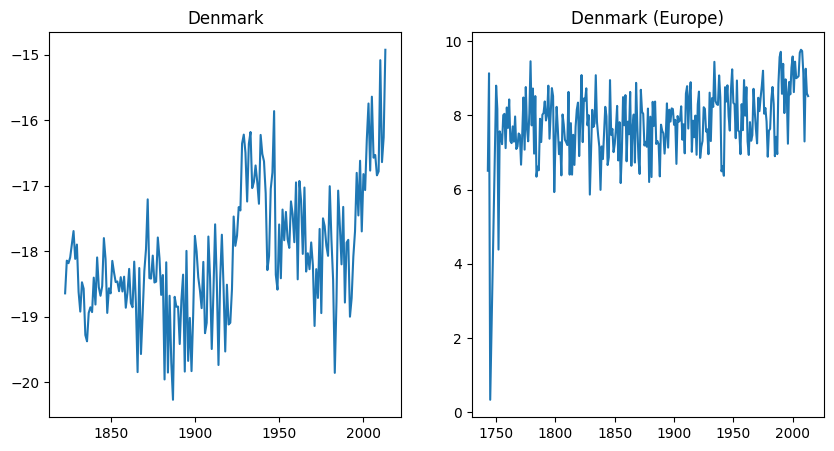

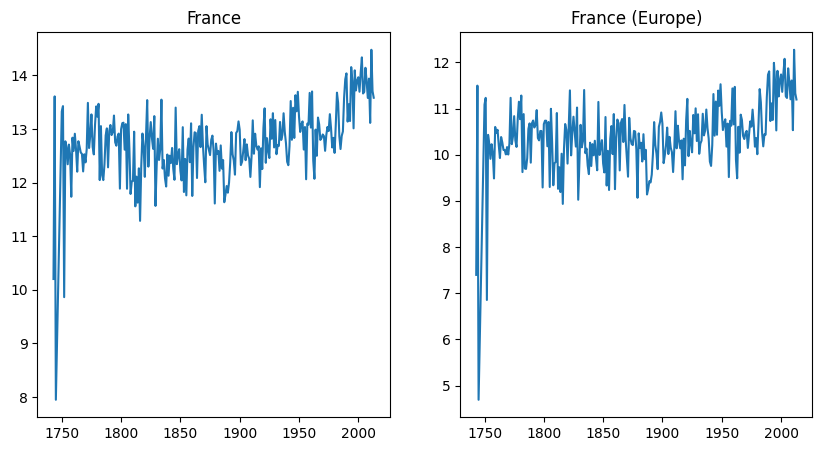

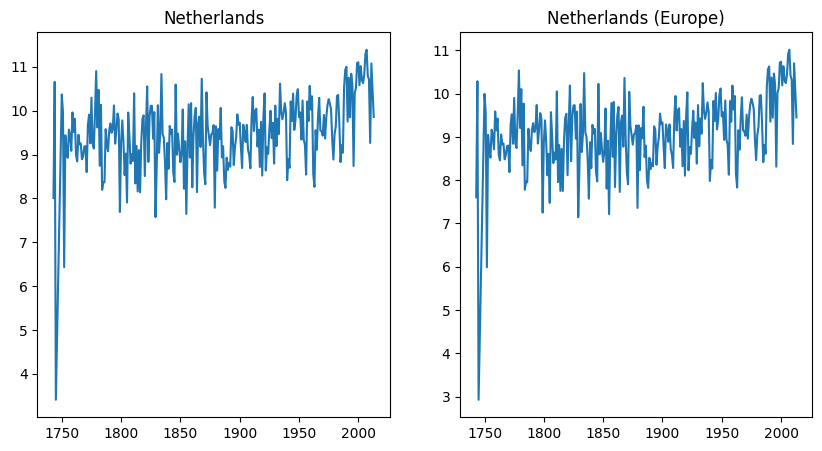

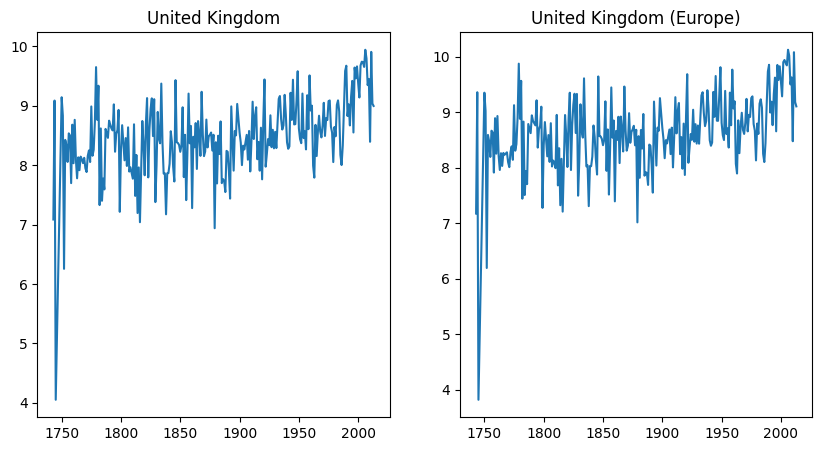

In [7]:
import matplotlib.pyplot as plt
for eu in europe:
    normal = eu.replace(' (Europe)', '')
    df_normal = df[df['Country'] == normal]
    df_europe = df[df['Country'] == eu]
    normal_year = df_normal.groupby(["Country","Year"]).agg(YearlyAverage=('AverageTemperature', 'mean'))
    europe_year = df_europe.groupby(["Country","Year"]).agg(YearlyAverage=('AverageTemperature', 'mean'))
    
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(normal_year.index.get_level_values('Year'), normal_year['YearlyAverage'])
    plt.title(normal)
    plt.subplot(1, 2, 2)
    plt.plot(europe_year.index.get_level_values('Year'), europe_year['YearlyAverage'])
    plt.title(eu)
    plt.show()
#Denmark is completely different (we need to use Denmark (Europe))